## Using KNN to predict Survival from the Titanic Dataset

**Problem Statement**
* Predict survival from the Titanic data based on given features

**Success Metrics**
* Attain 80% accuracy level for correct prediction

**Understanding the Context**
* Given the details of persons who were on board the Titanic virgin voyage, we wish to use the KNN algorithm to determine whether a passanger was likely to survive

**Experimental Design**

* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset
* Build a classification model to determine whether a passanger was likely to survice on the basis of chosen predictor features
* Evaluate the model
* Challenge your solution by providing insights on how you can make improvements in model improvement.


**Data Relevance**

The data available has information about the passangers who were on board the Titanic in its maiden voyage. It contains the PassangerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked. These shall be evaluated and the most relevant features for the model determined for use in the model.

In [58]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
# Loading our dataset
# Dataset one
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [60]:
# Checking columns un the train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Survived is the independent variable.

In [61]:
# Checking columns contained in the test data set
test.columns 

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* This data does not contain the label/independent variable column and is therefore not useful in a supervised learning problem

In [62]:
# Understanding the dataset
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# Checking the dimension of the data
train.shape

(891, 12)

In [65]:
# Checking the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
# Removing unnecessary features like PassengerId, Name, Ticket, Fare, Cabin
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [67]:
# Describing the whole data
train.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN


In [68]:
# Checking for presence of missing data in the data
missing_count = train.isnull().sum() # the count of missing values
value_count = train.isnull().count() # count of all missing values
missing_percentage = round(missing_count/value_count*100,2) # Percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
print(missing_df)

          count  percentage
Survived      0        0.00
Pclass        0        0.00
Sex           0        0.00
Age         177       19.87
SibSp         0        0.00
Parch         0        0.00
Embarked      2        0.22


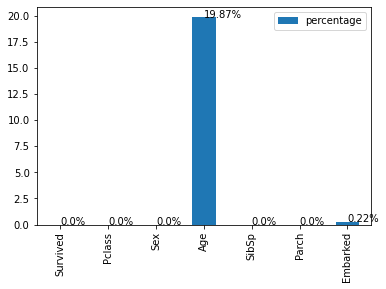

In [69]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percentage):
  barchart.text(index, percentage, str(percentage) + '%')

* The 'Age' column has got 19.87% values missing and the 'Embarked' has got 0.22% of its value missing
* The missing values in the 'Age' column can be filled using the median age
* The missing values in the 'Embarked' column can be filled with the most appearing values

In [70]:
# Filling the missing values in the 'Age' column
train['Age'] = train['Age'].fillna(train.Age.median())

In [71]:
# Finding the modal entry in the Embarkment colum
train.Embarked.mode()

0    S
dtype: object

In [72]:
# Filling in the modal value into the 'Embarkment' values to the missing values
train['Embarked'] = train['Embarked'].fillna('S')

In [80]:
# Identifying the unique values in each case

print('Survived: ', train.Survived.unique())
print('Pclass: ' ,train.Pclass.unique())
print('Sex:' ,train.Sex.unique())
print('SibSp: ' ,train.SibSp.unique())
print('Parch: ', train.Parch.unique())
print('Embarked: ' ,train.Embarked.unique())

Survived:  [0, 1]
Categories (2, int64): [0, 1]
Pclass:  [3, 1, 2]
Categories (3, int64): [3, 1, 2]
Sex: ['male', 'female']
Categories (2, object): ['male', 'female']
SibSp:  [1, 0, 3, 4, 2, 5, 8]
Categories (7, int64): [1, 0, 3, 4, 2, 5, 8]
Parch:  [0, 1, 2, 5, 3, 4, 6]
Categories (7, int64): [0, 1, 2, 5, 3, 4, 6]
Embarked:  ['S', 'C', 'Q']
Categories (3, object): ['S', 'C', 'Q']


* Survived, Pclass, Sex, SibSp, Parch and Embarked should be of type object
* Age is of type numeric

In [74]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [75]:
# Converting the columns to type object
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in cols:
  train[col] = train[col].astype('category')

In [76]:
train.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Embarked    category
dtype: object

* Since the data is mainly categorical, correlation matrix is not useful in investigating the relationship between the variables

In [77]:
# Checking the missing values once more
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## UNIVARIATE ANALYSIS

### Categorical Variables

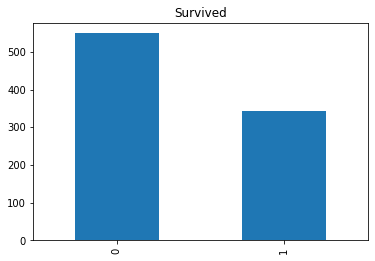

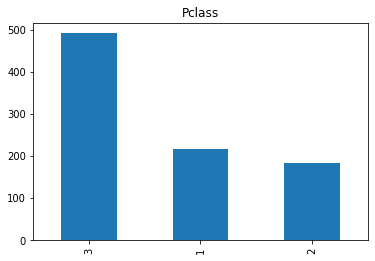

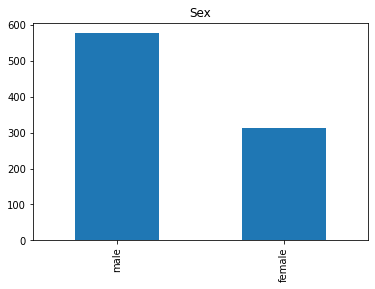

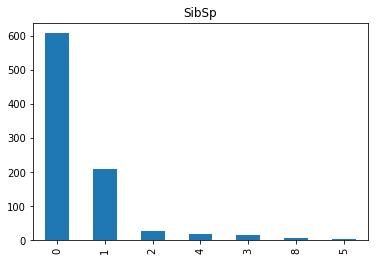

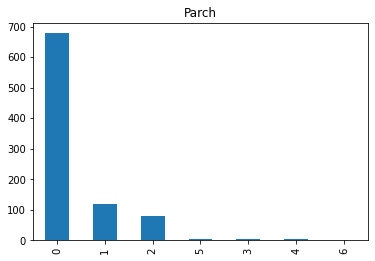

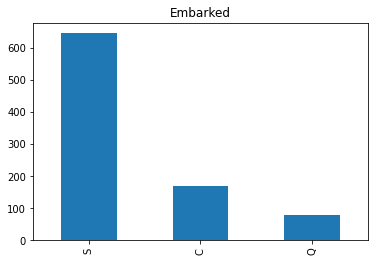

In [53]:
for col in cols:
  plt.figure(col)
  plt.title(col)
  train[col].value_counts().plot(kind='bar')

**Observations**
* Most people perished
* Majority boarded PClass 3
* Majority of those in the ship were male
* SibSp was the most common one
* Parch 0 was the most popular
* Embarked S was the most common one

### Numeric

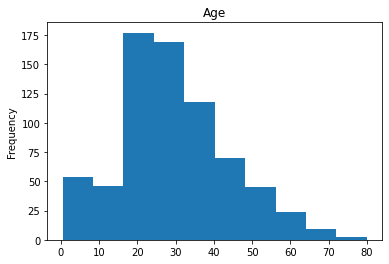

In [54]:
plt.figure('Age')
plt.title('Age')
train['Age'].plot(kind='hist')

Text(0, 0.5, 'Age')

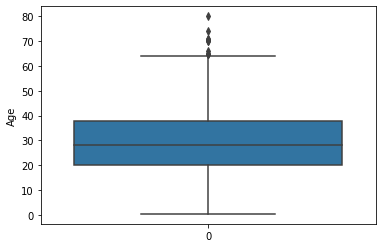

In [56]:
# Checking for outliers
sns.boxplot(data = train['Age'],orient="v")
plt.ylabel("Age")

* Majority of those who boarded the ship were of between ages 15 years and 45 years
* There were few individuals aged over 67 years on board

## BIVARIATE ANALYSIS

In [84]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

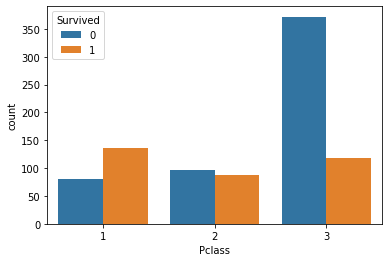

In [ ]:
# Pclass vs Survived
sns.countplot(x ='Pclass', data = train, hue='Survived') 
plt.show() 

* The probability of survival was high from **Pclass 1** than in any other class, this was however lowest in **Pclass 3**

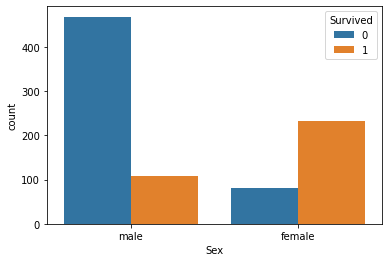

In [ ]:
# Sex vs Survived
sns.countplot(x ='Sex', data = train, hue='Survived') 
plt.show() 

* More female survived than males

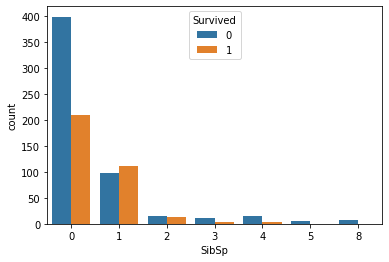

In [ ]:
# SibSp Vs Survived
sns.countplot(x ='SibSp', data = train, hue='Survived') 
plt.show() 

* Seemingly survival does not depend on SibSp. However, this will be investigated with the correlation coefficient

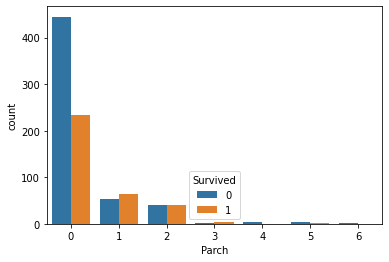

In [ ]:
# Parch Vs Survived
sns.countplot(x ='Parch', data = train, hue='Survived') 
plt.show() 

* The number of persons who survived was highest in Parch 0, followed by 1 and so on

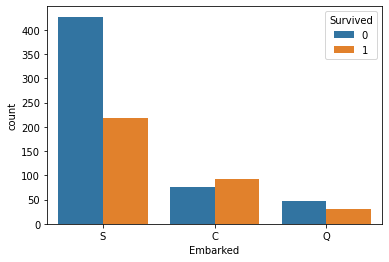

In [ ]:
# Embarked Vs Survived
sns.countplot(x ='Embarked', data = train, hue='Survived') 
plt.show() 

* The number of persons who survived was higher in Embarked S, followed by C then finally Q

## MODEL

This is a **classification** problem.

Label Encoding

In [99]:
labelEncoder = LabelEncoder()
train['Sex'] = labelEncoder.fit_transform(train['Sex'])
train['Embarked'] = labelEncoder.fit_transform(train['Embarked'])

In [100]:
# Splitting our dataset into its attributes and labels
X = train.iloc[:, 1:]
y = train.iloc[:, :1]

In [101]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [102]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
# Making predictions on our test data
y_pred = classifier.predict(X_test)

In [105]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [28 41]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.75      0.59      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



**Alternative Split Sizes of the Test Data and Different k-values**

* The data shall be split into 80 - 20, 70 - 30 and 60 - 40 trainiing and testing datasets whih chall be evaluated separately

In [108]:
# Splitting the dataset

# Various test dataset sizes 20%, 30% and 40%
test_sizes = [0.2, 0.3, 0.4]
for size in test_sizes:

  # Splitter function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)

  # Number of neighbors
  k_range = range(1, 10)

  scores = {}
  
  print('')
  print('Test size: ', size*100,'%')

  # Fitting and evaluating the model
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.update({k : metrics.accuracy_score(y_test, y_pred)})
  print(scores)


Test size:  20.0 %
{1: 0.6983240223463687, 2: 0.7150837988826816, 3: 0.7541899441340782, 4: 0.7374301675977654, 5: 0.7374301675977654, 6: 0.7318435754189944, 7: 0.7318435754189944, 8: 0.7094972067039106, 9: 0.7206703910614525}

Test size:  30.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed

{1: 0.7014925373134329, 2: 0.7014925373134329, 3: 0.7238805970149254, 4: 0.7276119402985075, 5: 0.7425373134328358, 6: 0.6977611940298507, 7: 0.7350746268656716, 8: 0.7126865671641791, 9: 0.7388059701492538}

Test size:  40.0 %
{1: 0.7086834733893558, 2: 0.7142857142857143, 3: 0.742296918767507, 4: 0.7254901960784313, 5: 0.7338935574229691, 6: 0.7366946778711485, 7: 0.7478991596638656, 8: 0.7198879551820728, 9: 0.7563025210084033}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed

**Findings**
* With 20% training dataset k = 3 provides the highest accuracy at 75.42%
* At 30% training dataset k = 4 provides the best model with an accuracy of 72.76%. *Notably k =3 also gives a gives a fairly high accurecy scores of 72.39%*
* With 40% of the data set as the training data, the model with k = 3 provides the best model with an accuracy score of 74.23%

## FOLLOW UP QUESTIONS

a). Did we have the right data?

> Yes. However, more data should be colleced for a much better model parameters

b). Do we need other data to answer our question?
> No

c). Did we have the right question?
> Yes